<a href="https://colab.research.google.com/github/kn9ck/MAT422/blob/master/HW_3_5_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clusters and Supprot Vector Machine

## 3.5 K-means Clustering
**K-means clustering** is a common unsupervised learning algorithm that segments n observations into k clusters. The algorithm finds the clusters such that each of the observations is allocated to the cluster with the nearest mean, known as the centroid.

**K-means** tries to minimize the within-cluster sum of squares, the sum of squared distances between each observation and the mean of the cluster it has been assigned to. Instead of regular Euclidean distance, it uses a squared Euclidean distance as the distance measure which allows it to converge faster to a local.

#### Algorithm:

1. Determine the number of clusters the data should be divided into.

2. Randomly select $k$ points from the data as initial centroids.

3. Cluster the remaining data points by assigning each to the closest centroid based on the Euclidean distance of the point from the centroid.

4. Take the mean of all the points in each cluster and update the centroid of that cluster to the mean.

5. Steps 2, 3, and 4 are repeated until the points assigned to each cluster no longer change, indicating that the algorithm has reached a local minimum.

This algorithm ensures that the within-cluster sum of squares decreases with each iteration since each point is always assigned to the nearest centroid, so it gradually optimizes the WCSS.

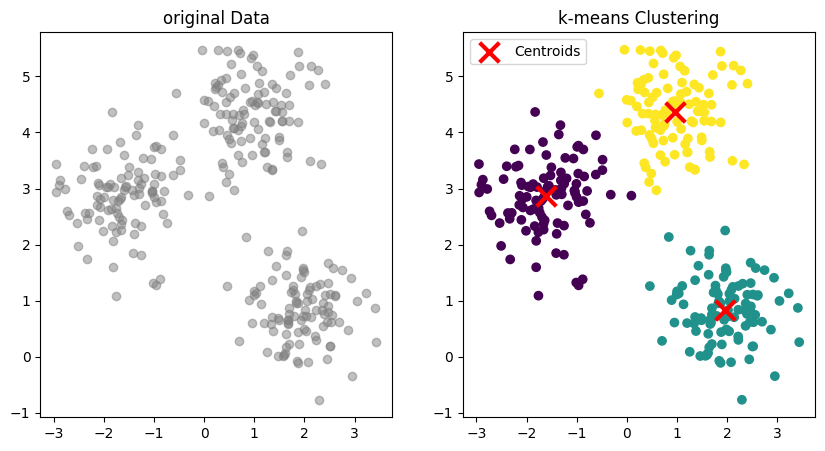

Within-cluster sum of squares: 212.36


In [10]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#generate sample data with 3 clusters
n_samples = 300
X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.60, random_state=0)

#initialize and fit k-means
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

#plot
plt.figure(figsize=(10, 5))

#original data
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
plt.title('original Data')

#k-means clusters
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                marker='x', s=200, linewidths=3, color='r', label='Centroids')
plt.title('k-means Clustering')
plt.legend()
plt.show()

#print WCSS
print(f"Within-cluster sum of squares: {kmeans.inertia_:.2f}")



In this example we generates synthetic data with 3 distinct clusters. Then we apply the k-means clustering algorithm.

## 3.6 Support Vector Machine (SVM)
The basic idea of **Support Vector Machine** is to find such a hyperplane that will be the best for the class separation between data points by maximizing the margin between classes.

In this case, the margin is defined as the distance between the hyperplane and the closest data points from each of the classes. These nearest located points, are called **support vectors**, and they define the boundaries of the margins.

If we have a set of training data points $(x_i, y_i)$, where $y_i$ can be either $1$ or $-1$ (indicating the class), **SVM** finds a hyperplane that maximizes the separation of classes. For linearly separable data, this hyperplane can be defined as: $$w^Tx-b=0$$ where $w$ is the normal vector to the hyperplane.

Two additional parallel hyperplanes are defined by: $$w^Tx-b=1 \text{   and   } w^Tx-b=-1$$ Data points are classified based on *which side of the margin they fall on*.

The goal of SVM is to minimize the norm $||w||$, while making all points fall in the correct side of the margin, which can be set as maximizing margin. The optimization is expressed as: $$\text{min}_{w,b}\lambda ||w||^2+ \frac{1}{n} \sum_{i=1}^n \text{max}(0,1-y_i( \langle w,x_i \rangle -b))$$ where $\lambda ||w||^2$ is the regularization term to control marign size.

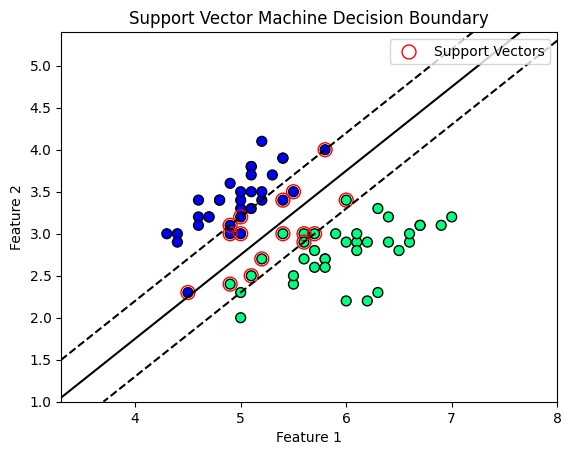

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[iris.target != 2, :2]  # Using first two features for visualization
y = iris.target[iris.target != 2]

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#fit model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

#plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter', marker='o', edgecolor='k', s=50)
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolor='red', label='Support Vectors')
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vector Machine Decision Boundary')
plt.legend()
plt.show()


This example demonstrates an SVM applied to a two class subset of the Iris dataset and visualizes the decision boundary with support vectors.